In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
from sklearn import decomposition

In [2]:
# 读取文件
datafile = r'Live_20210128.csv'
df = pd.read_csv(datafile) #creates a dataframe

In [3]:
#探索性数据分析
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
# 去除空值和缺失值
df.drop(['Column1', 'Column2', 'Column3', 'Column4'],
        axis=1, inplace=True)

# 删除不需要的分类变量，
# 这里删除索引status_id
df.drop(['status_id'],
        axis=1, inplace=True)

df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


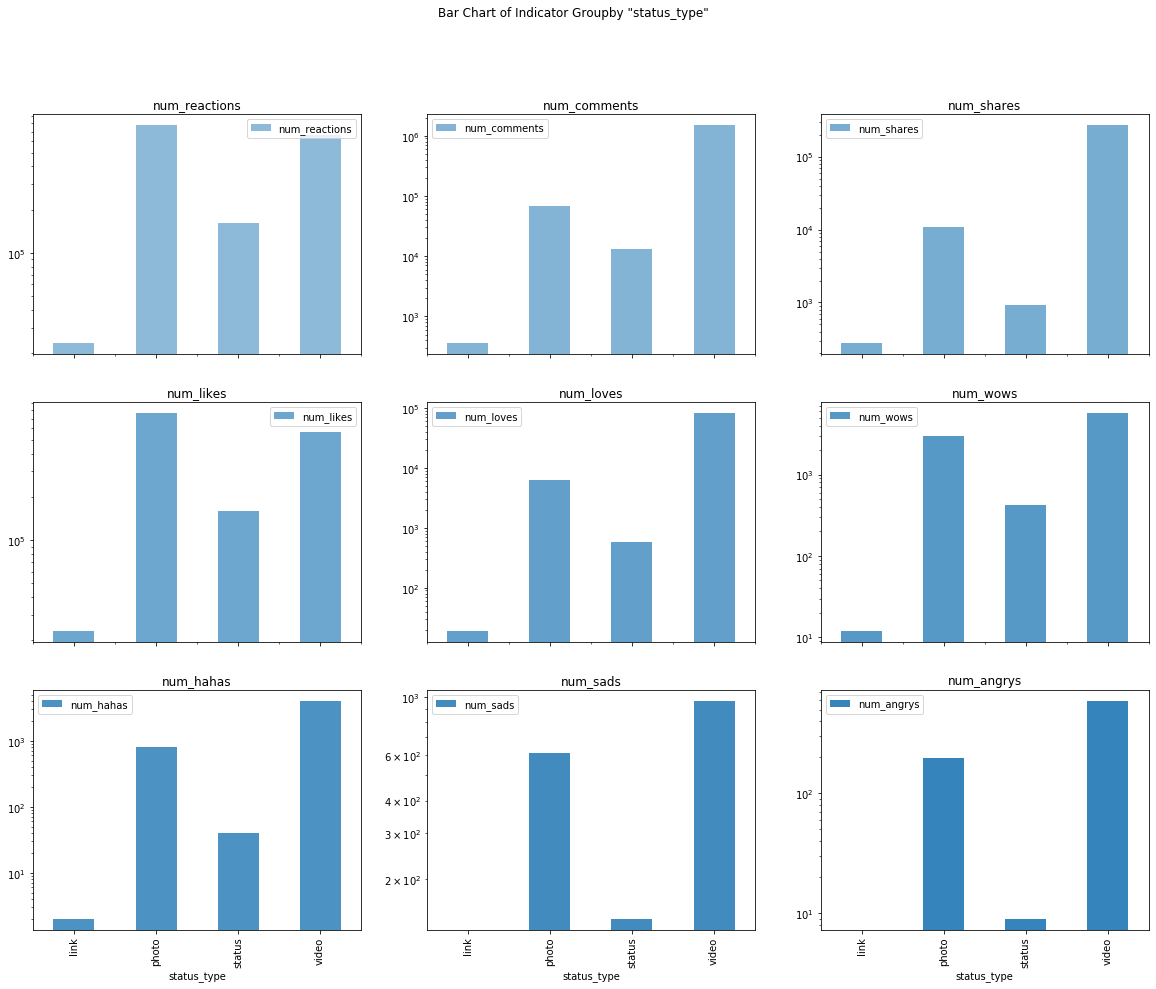

In [7]:
# 可视化数据
# 通过status_type分组画柱状图，
# status_id有四种选择：status，link，photo，video
labels=['num_reactions','num_comments','num_shares',
       'num_likes','num_loves','num_wows',
       'num_hahas','num_sads','num_angrys']

fig = plt.figure(figsize=(20,15))
fig.suptitle('Bar Chart of Indicator Groupby "status_type"')
for num in range(len(labels)):
    ax=fig.add_subplot(3,3,num+1)
    df.groupby('status_type').sum().plot(
        ax=ax,
        sharex=True,
        subplots=True,
        alpha=0.5+0.05*num,
        kind='bar',
        y=labels[num],
        logy=True)
fig.savefig('1.Group_labels_bar.png')


In [8]:
# 对分类变量进行编码，
# 即把无法数值表示的status_type编码成数值
# 0 = link,
# 1 = photo,
# 2 = status,
# 3 = video,

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encode_type']= le.fit_transform(df['status_type']) 
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,encode_type
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


In [9]:
#处理时间问题,将时间按照周几和发布时间来区分，变量因此变成7+24类型
def ymd2weekdays(year,month,day):
    from datetime import datetime
    today = datetime(year,month,day,6,30,30,0)
    week = today.weekday()
    # 周一开始为0,1,2,3,4,5,6
    return week

published = df['status_published'].tolist()
weekdays = []
timehours = []
for day in published:
    res = day.split(' ')
    ymd = res[0].split('/')
    hour = res[1].split(':')
    weekdays.append(ymd2weekdays(int(ymd[2]),int(ymd[0]),int(ymd[1])))
    timehours.append(int(hour[0]))
df['weekdays'] = pd.DataFrame(weekdays)
df['hours'] = pd.DataFrame(timehours)
df.drop(['status_published'],axis=1, inplace=True)

In [10]:
df.head()
popularity = []
reactions = df['num_reactions'].tolist()
comments = df['num_comments'].tolist()
shares = df['num_shares'].tolist()

positive = []
likes = df['num_likes'].tolist()
loves = df['num_loves'].tolist()
wows = df['num_wows'].tolist()
hahas = df['num_hahas'].tolist()

negtive = []
sads = df['num_sads'].tolist()
angrys = df['num_angrys'].tolist()

lenght = len(shares)
for i in range(lenght):
    popularity.append(reactions[i]+comments[i]+shares[i]) 
    positive.append(likes[i]+loves[i]+wows[i]+hahas[i])
    negtive.append(sads[i]+angrys[i])
df['popularity'] = pd.DataFrame(popularity)
df['positive'] = pd.DataFrame(positive)
df['negtive'] = pd.DataFrame(negtive)
df.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,encode_type,weekdays,hours,popularity,positive,negtive
0,video,529,512,262,432,92,3,1,1,0,3,6,6,1303,528,1
1,photo,150,0,0,150,0,0,0,0,0,1,5,22,150,150,0
2,video,227,236,57,204,21,1,1,0,0,3,5,6,520,227,0
3,photo,111,0,0,111,0,0,0,0,0,1,5,2,111,111,0
4,photo,213,0,0,204,9,0,0,0,0,1,2,3,213,213,0


In [11]:
# 列变量数值标准化，
# 最后的取值范围中间值为0
cols = df.columns
zcols = []
df_std = pd.DataFrame()
for col in cols:
    if col!="status_type":
        df_std['z'+col] = (df[col] - df[col].mean())/df[col].std()
        zcols.append('z'+col)
df_std.to_csv('2.Live_20210128_std_pro.csv')
df_std.head()

,znum_reactions,znum_comments,znum_shares,znum_likes,znum_loves,znum_wows,znum_hahas,znum_sads,znum_angrys,zencode_type,zweekdays,zhours,zpopularity,zpositive,znegtive
0,0.646058,0.323327,1.686759,0.482692,1.983126,0.196182,0.076708,0.473537,-0.155737,1.374190,1.482982,-0.265650,0.701723,0.644964,0.348320
1,-0.173179,-0.252188,-0.304123,-0.144710,-0.318432,-0.147869,-0.175997,-0.152576,-0.155737,-0.748053,0.986165,2.057604,-0.298997,-0.172480,-0.193289
2,-0.006738,0.013088,0.129008,-0.024569,0.206924,-0.033185,0.076708,-0.152576,-0.155737,1.374190,0.986165,-0.265650,0.022136,-0.005963,-0.193289
3,-0.257481,-0.252188,-0.304123,-0.231478,-0.318432,-0.147869,-0.175997,-0.152576,-0.155737,-0.748053,0.986165,-0.846464,-0.332847,-0.256819,-0.193289
4,-0.037000,-0.252188,-0.304123,-0.024569,-0.093279,-0.147869,-0.175997,-0.152576,-0.155737,-0.748053,-0.504287,-0.701260,-0.244318,-0.036239,-0.193289


In [12]:
#**************************************************************************
#       zcols是进行聚类分析的列名的list，请使用标准化之后的列名（前缀z）
#       avg_name只是为了后续计算各个类别这些个指标的平均值，是zcols去掉前缀的标签值
#**************************************************************************
all_cols = list(df_std.columns)
all_cols.insert(0,"encode_type")
print("可进行聚类的指标有：",all_cols)


# zcols=['zencode_type','zweekdays','zhours','zpopularity','zpositive','znegtive']
zcols=['zweekdays','zhours','zpopularity']

avg_name=[]
for name in zcols:
    avg_name.append(name[1:])
    
print("\n最终选取进行聚类的标签为：",zcols)


可进行聚类的指标有： ['encode_type', 'znum_reactions', 'znum_comments', 'znum_shares', 'znum_likes', 'znum_loves', 'znum_wows', 'znum_hahas', 'znum_sads', 'znum_angrys', 'zencode_type', 'zweekdays', 'zhours', 'zpopularity', 'zpositive', 'znegtive']

最终选取进行聚类的标签为： ['zweekdays', 'zhours', 'zpopularity']


In [13]:


# 执行K-means聚类
from sklearn import cluster
model = cluster.KMeans(n_clusters=4, random_state=2021)
# 把所有列都丢到模型里面去聚类
model.fit(df_std[zcols])


KMeans(n_clusters=4, random_state=2021)

In [14]:
# 添加分类标签结果
df['cluster'] = model.labels_
df['cluster'].describe()


count    7050.000000
mean        1.422270
std         1.123771
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: cluster, dtype: float64

**Perform PCA**

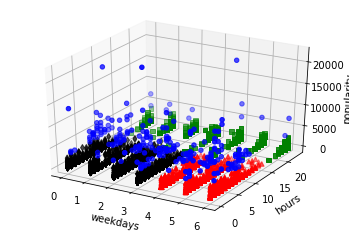

In [15]:
# 如果聚类的阶数大于3维，就进行PCA，
# 聚类的阶数等于3维，不进行PCA，直接画三维立体散点图
# 聚类的阶数等于2维，不进行PCA，直接画平面散点图
dim = len(zcols)

if dim>3:
    # 定义一个PCA对象，n_components设置为3。
    pca = decomposition.PCA(n_components=3,whiten=True)

    # 使用这个PCA项目来转换标准化的数据，并将转换后的维度存储在varX，varY，varZ中。
    df['varX'], df['varY'],df['varZ'] = zip(*pca.fit_transform(df_std[zcols]))    
    # 绘制出缩小的脱敏空间中的群组
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.figure().add_subplot(111, projection = '3d')

    colors = ['r', 'b', 'k', 'g'] 
    markers = ['^', 'o', 'd', 's']

    for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        ax.scatter(d['varX'], d['varY'],d['varZ'], marker=markers[c], color=colors[c])

    plt.savefig("4.Cluster_result_pro.png")
elif dim ==3:
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.figure().add_subplot(111, projection = '3d')

    colors = ['r', 'b', 'k', 'g'] 
    markers = ['^', 'o', 'd', 's']

    for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        ax.scatter(d[avg_name[0]], d[avg_name[1]],d[avg_name[2]], marker=markers[c], color=colors[c])
    
    ax.set_zlabel(avg_name[2])
    plt.xlabel(avg_name[0])
    plt.ylabel(avg_name[1])
    plt.savefig("4.Cluster_result_pro.png")
elif dim == 2:
    colors = ['r', 'b', 'k', 'g'] 
    markers = ['^', 'o', 'd', 's']
    ax = plt.figure().add_subplot(111)

    for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        ax.scatter(d[avg_name[0]], d[avg_name[1]], marker=markers[c], color=colors[c])

    plt.xlabel(avg_name[0])
    plt.ylabel(avg_name[1])
    plt.savefig("4.Cluster_result_pro.png")

else:
    print("聚类的维数请大于1")


In [16]:
result = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
rows = df.shape[0]
list_df = df.values.tolist()
# print(df.head())

for da in list_df:
    result[da[16]][da[10]]=result[da[16]][da[10]]+1


In [17]:
# 观察每个群组的变量的平均值，以了解群组所捕捉到的东西。
for cluster in df['cluster'].unique():
    print("\nCluster: " + str(cluster))
    tmp=[]
    for col in avg_name:
        print(col + ": {:.6f}".format(df.loc[df['cluster'] == cluster, col].mean()))
        #print(df.loc[df['cluster'] == cluster, col].mean().tolist())
        tmp.append(df.loc[df['cluster'] == cluster, col].mean().tolist())
    result[cluster].extend(tmp)



Cluster: 0
weekdays: 5.026699
hours: 5.060680
popularity: 323.430825

Cluster: 3
weekdays: 3.003575
hours: 21.835567
popularity: 348.663092

Cluster: 2
weekdays: 1.470570
hours: 5.088135
popularity: 320.440673

Cluster: 1
weekdays: 3.012097
hours: 7.725806
popularity: 5111.229839


In [18]:
df.to_csv('5.Facebook_Clusters_pro.csv')